In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Titanic Survival Prediction Project

This notebook analyzes the famous Titanic dataset to predict passenger survival. We'll go through data loading, exploration, preprocessing, and modeling to predict who survived the Titanic disaster.

## 1. Data Loading and Initial Exploration

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Cleaning and Missing Values
Understanding and handling missing values in our dataset.

### Data Preproccsiong

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing VAlues

In [8]:
df = df.drop('Cabin', axis=1)

## 3. Feature Engineering and Data Preprocessing


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean)

In [10]:
df['Embarked'] = df['Embarked'].dropna

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### EDA

In [12]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

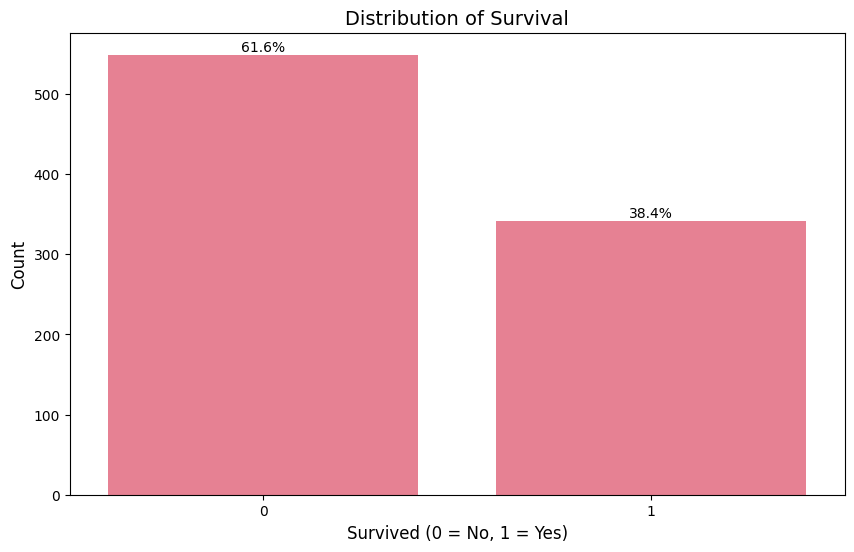

In [16]:
sns.set_palette("husl")

# Create a figure for survival distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survival', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add percentage labels on top of each bar
total = len(df['Survived'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plt.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

## 4. Data Visualization and Analysis


### Survival Rate by Gender
Let's analyze how survival rates differed between male and female passengers.

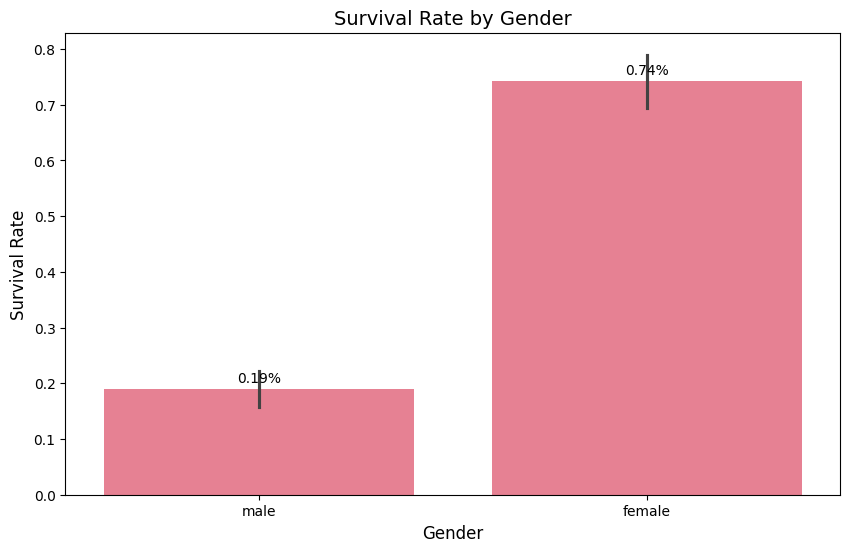

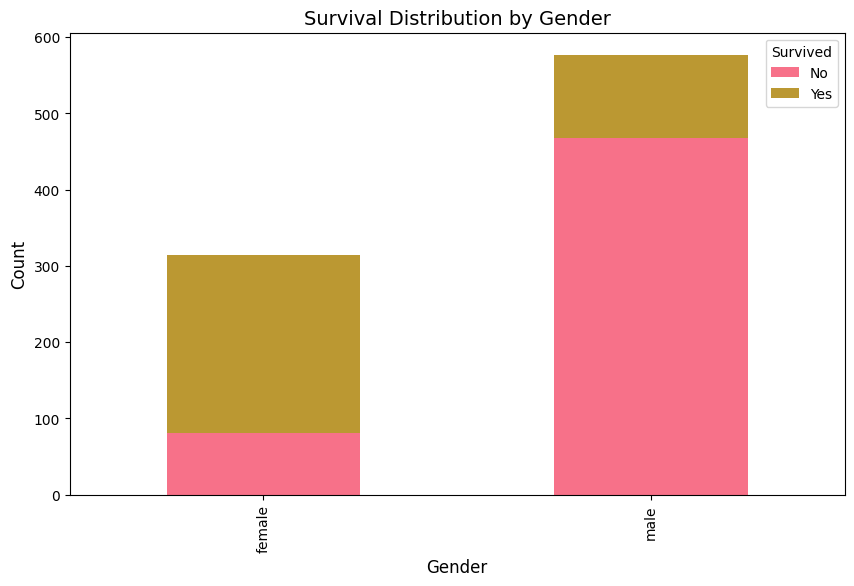

In [17]:
# Create plot for survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Create a more detailed view using crosstab
survival_by_gender = pd.crosstab(df['Sex'], df['Survived'])
survival_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Survival Rate by Passenger Class
Let's examine how passenger class (Pclass) affected survival rates.

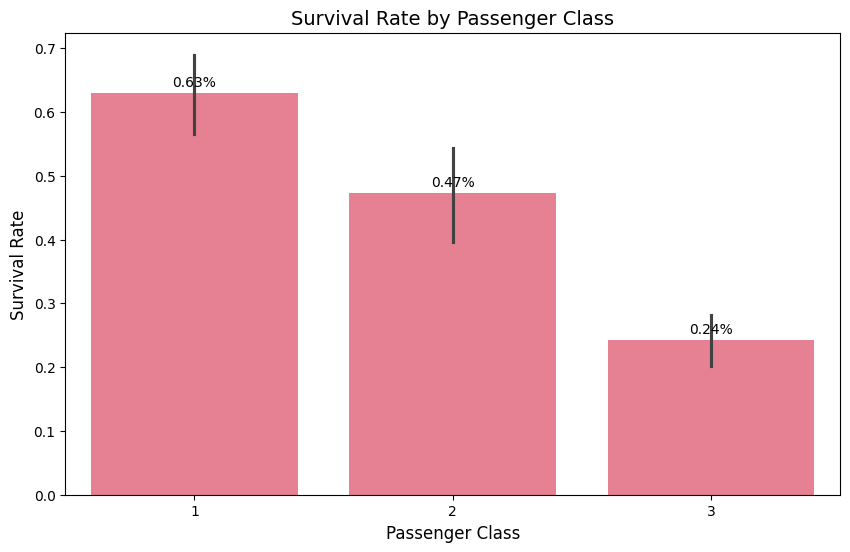

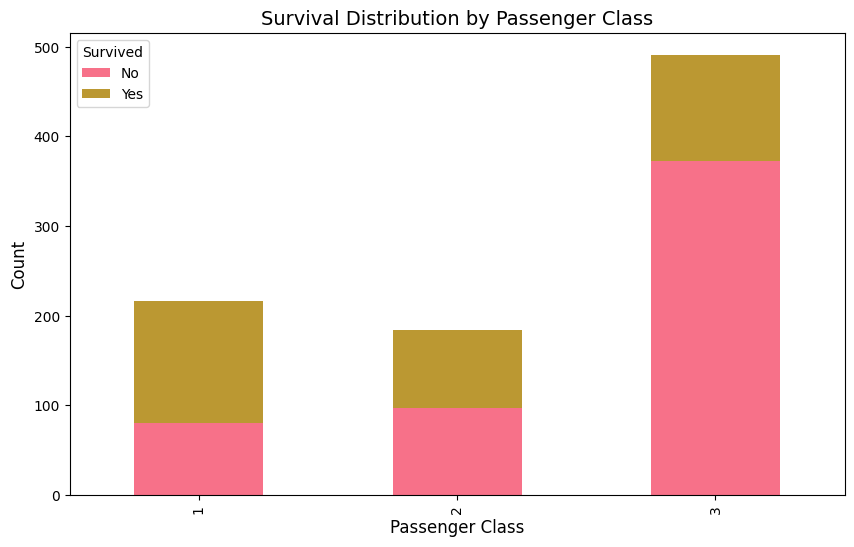

In [18]:
# Create plot for survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f%%', padding=3)

plt.show()

# Create a more detailed view
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_by_class.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Distribution by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### 4.2 Gender and Survival
Analyzing how gender affected survival rates.

### Age Distribution and Survival
Let's analyze how age affected survival rates.

### Correlation Matrix
Let's create a correlation matrix to understand the relationships between numerical variables.

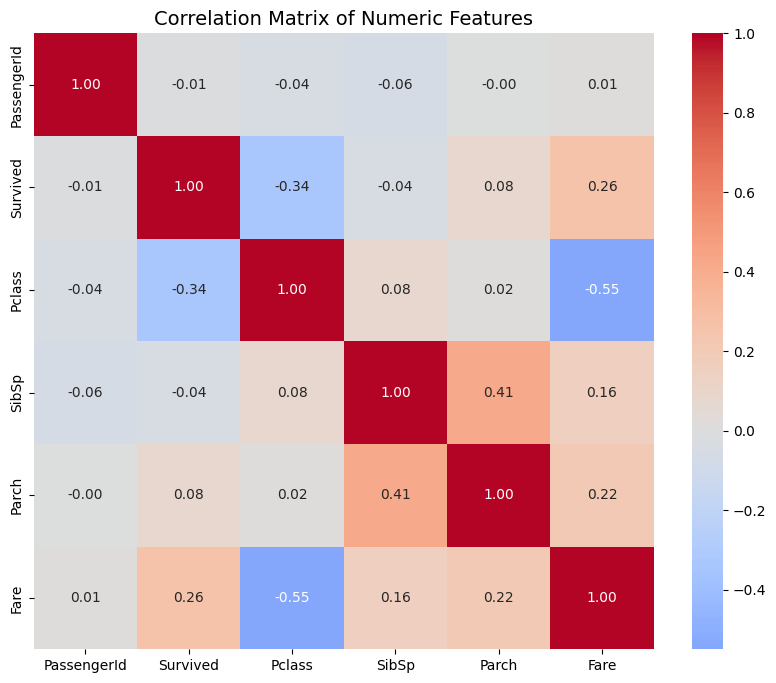


Correlation with Survival:
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Pclass        -0.338481
Name: Survived, dtype: float64


In [19]:
# Calculate correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.show()

# Print correlation with 'Survived' variable
print("\nCorrelation with Survival:")
print(correlation_matrix['Survived'].sort_values(ascending=False))

## 5. Feature Encoding
Converting categorical variables to numerical format for machine learning.

### 5.1 Categorical Variable Encoding
Using one-hot encoding with dropping first category to avoid multicollinearity.

We'll use pandas `get_dummies()` function to convert categorical variables into numerical format through one-hot encoding. 

Important note: When using dummy variables, we need to drop one category from each feature to avoid the "dummy variable trap" (multicollinearity). This is because:
- If we have a binary feature (like Sex: male/female), we only need one column (0=male, 1=female)
- For features with n categories, we only need n-1 dummy columns because the last category can be inferred from the others
- We use `drop_first=True` in `get_dummies()` to handle this automatically

In [20]:
# First, let's identify our categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns in the dataset:")
print(categorical_columns)

# Show an example of dummy variables before and after dropping first category
print("\nExample with 'Sex' column:")
print("Without dropping first category (includes both):")
example_full = pd.get_dummies(df[['Sex']])
print(example_full.columns.tolist())

print("\nWith dropping first category (drop_first=True):")
example_dropped = pd.get_dummies(df[['Sex']], drop_first=True)
print(example_dropped.columns.tolist())

# Create a copy of the dataframe to keep the original intact
df_encoded = df.copy()

# Convert categorical variables to numerical using get_dummies
# drop_first=True removes one category from each feature to avoid multicollinearity
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

# Show the encoded columns
print("\nFinal encoded categorical columns:")
print([col for col in df_encoded.columns if any(cat in col for cat in categorical_columns)])

# Display the first few rows of the encoded dataset
print("\nFirst few rows of the encoded dataset:")
display(df_encoded.head())

# Display the new shape of the dataset
print("\nNew shape of the dataset:", df_encoded.shape)

Categorical columns in the dataset:
Index(['Name', 'Sex', 'Age', 'Ticket', 'Embarked'], dtype='object')

Example with 'Sex' column:
Without dropping first category (includes both):
['Sex_female', 'Sex_male']

With dropping first category (drop_first=True):
['Sex_male']

Final encoded categorical columns:
['Name_Abbott, Mr. Rossmore Edward', 'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel', 'Name_Abelson, Mrs. Samuel (Hannah Wizosky)', 'Name_Adahl, Mr. Mauritz Nils Martin', 'Name_Adams, Mr. John', 'Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'Name_Aks, Mrs. Sam (Leah Rosen)', 'Name_Albimona, Mr. Nassef Cassem', 'Name_Alexander, Mr. William', 'Name_Alhomaki, Mr. Ilmari Rudolf', 'Name_Ali, Mr. Ahmed', 'Name_Ali, Mr. William', 'Name_Allen, Miss. Elisabeth Walton', 'Name_Allen, Mr. William Henry', 'Name_Allison, Master. Hudson Trevor', 'Name_Allison, Miss. Helen Loraine', 'Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'Name_Allum, Mr. Owen George', 'Nam

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,1,0,7.2500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1,0,71.2833,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,0,0,7.9250,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,1,0,53.1000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



New shape of the dataset: (891, 1665)


## 6. Model Preparation and Training
Preparing features for model training and selecting the model.

In [38]:
X = df_encoded.drop("Survived", axis=1)
y = df_encoded["Survived"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

C:\Users\Yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [44]:
model.score(X,y)

0.8799102132435466